In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/Data/Exam_Score_Prediction.csv")

In [3]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [5]:
df.dtypes

,0
student_id,int64
age,int64
gender,object
course,object
study_hours,float64
class_attendance,float64
internet_access,object
sleep_hours,float64
sleep_quality,object
study_method,object


In [6]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
categorical = df.select_dtypes(include=["object"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns

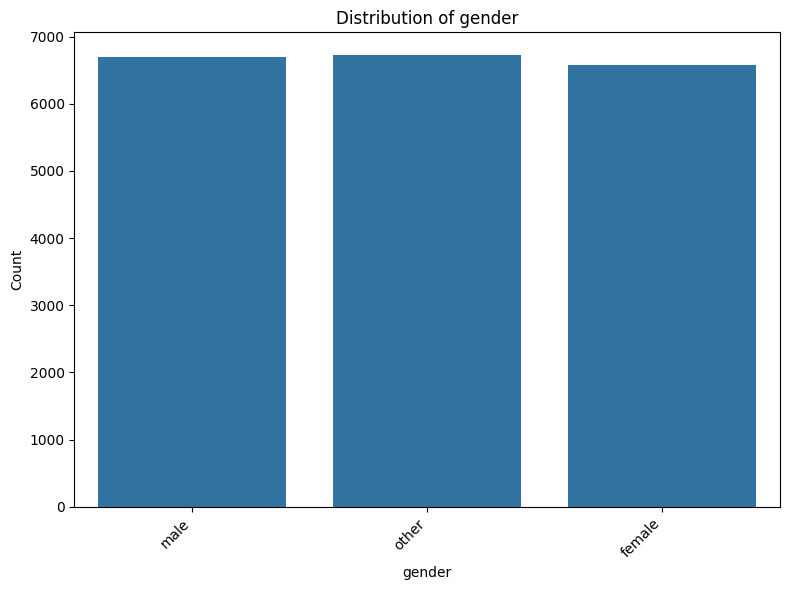

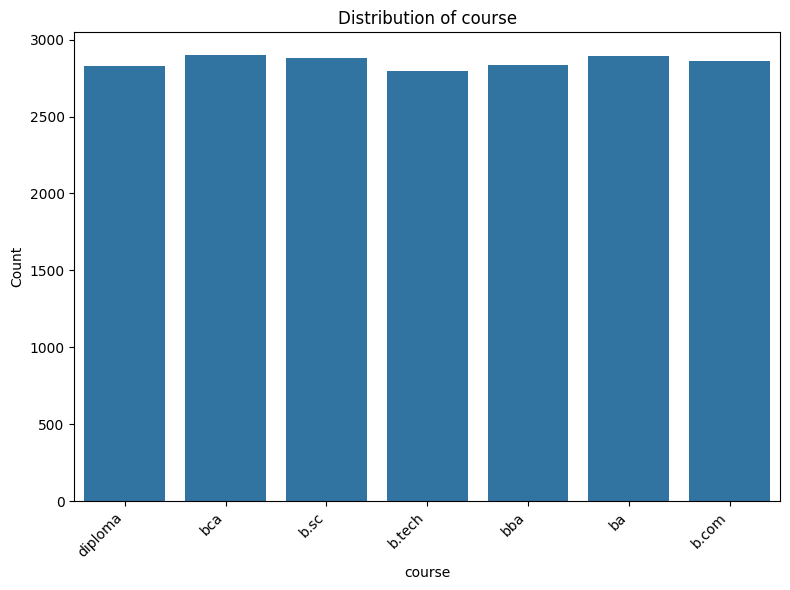

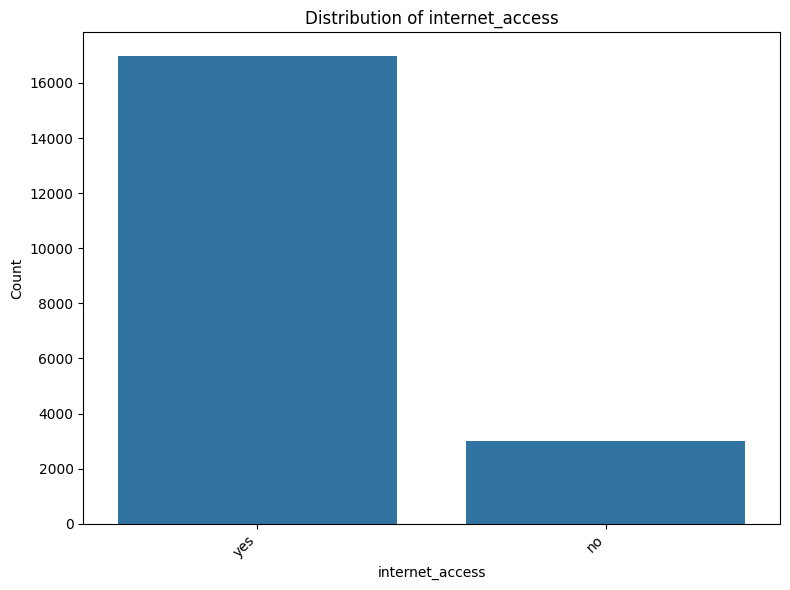

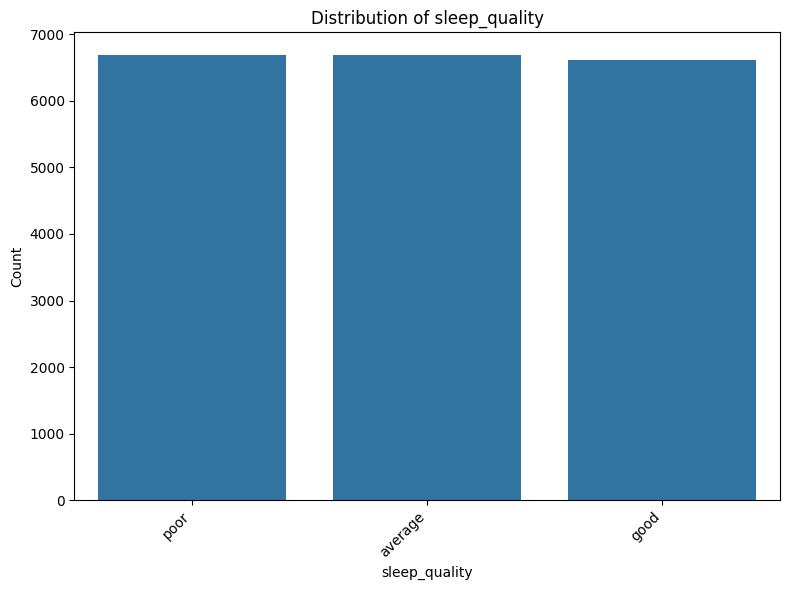

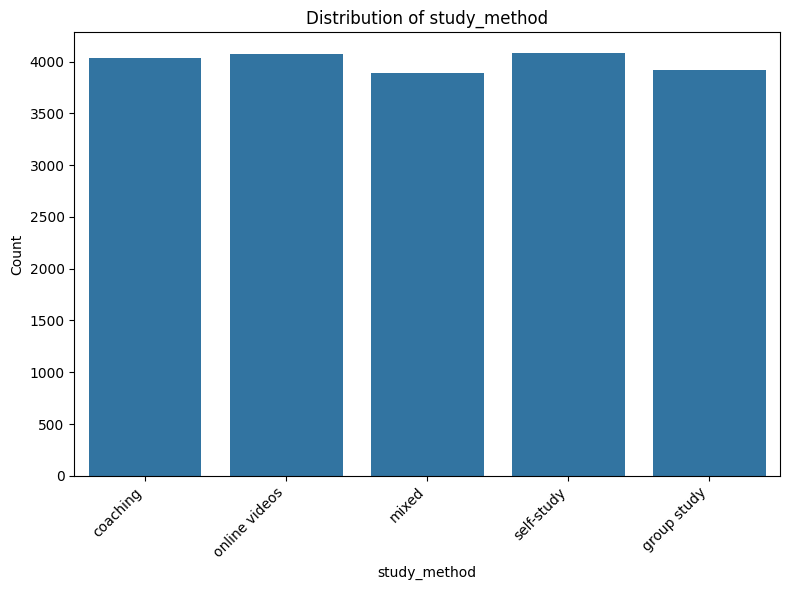

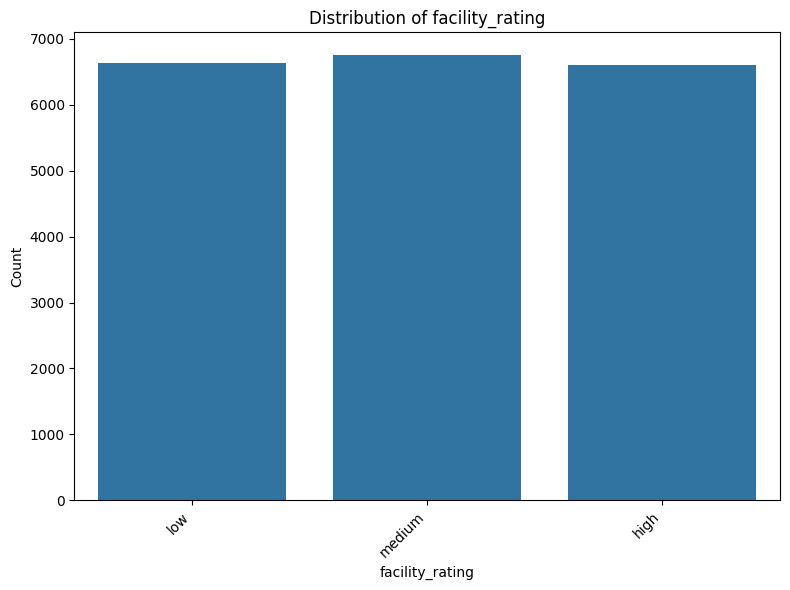

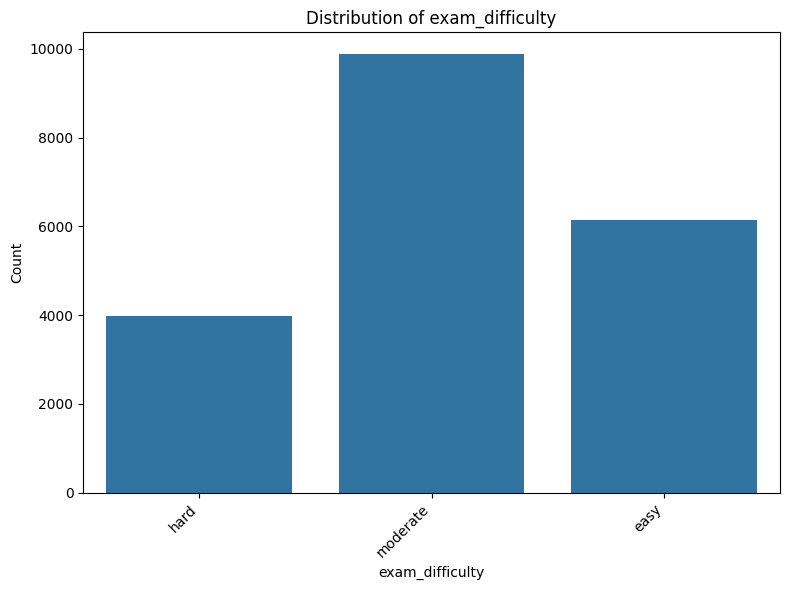

In [9]:
for col in categorical:
  plt.figure(figsize=(8,6))
  sns.countplot(data=df, x=col)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

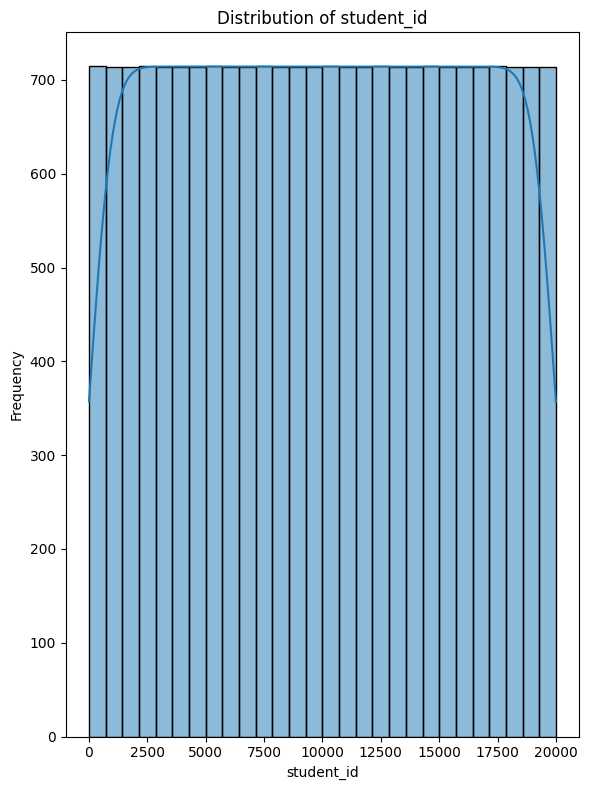

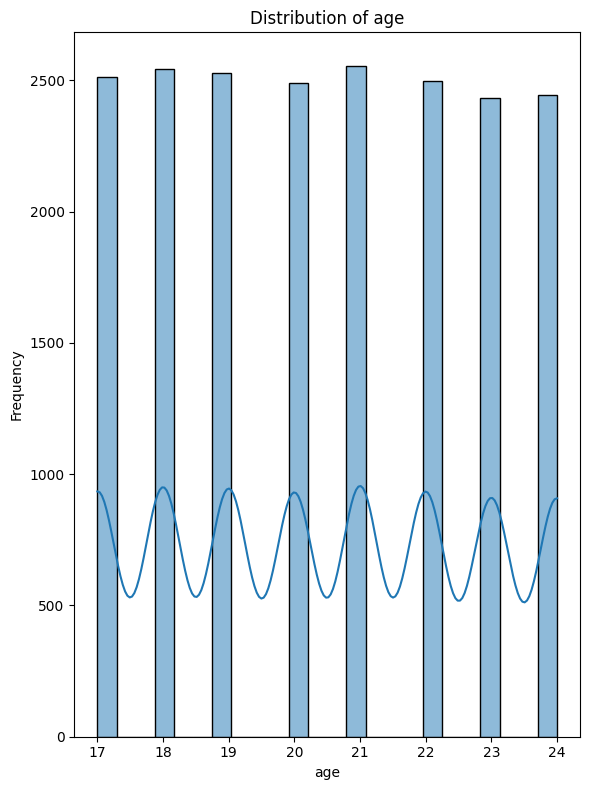

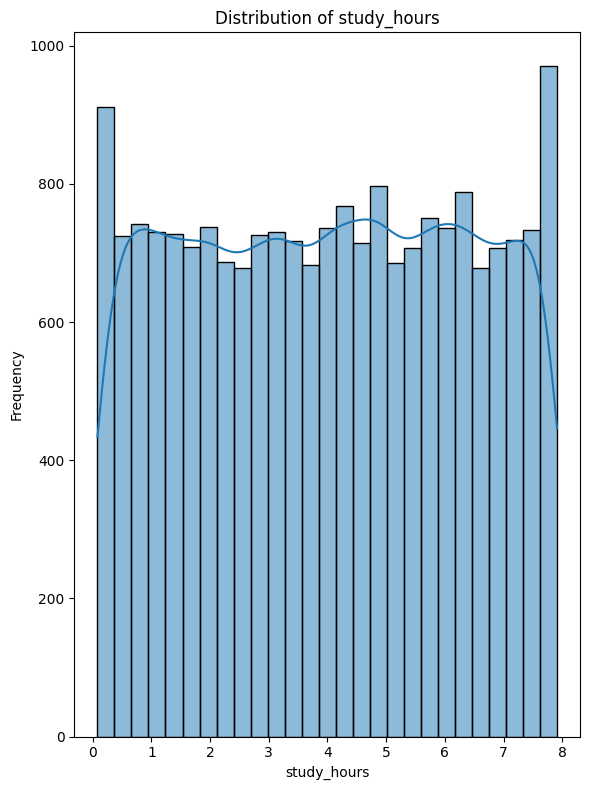

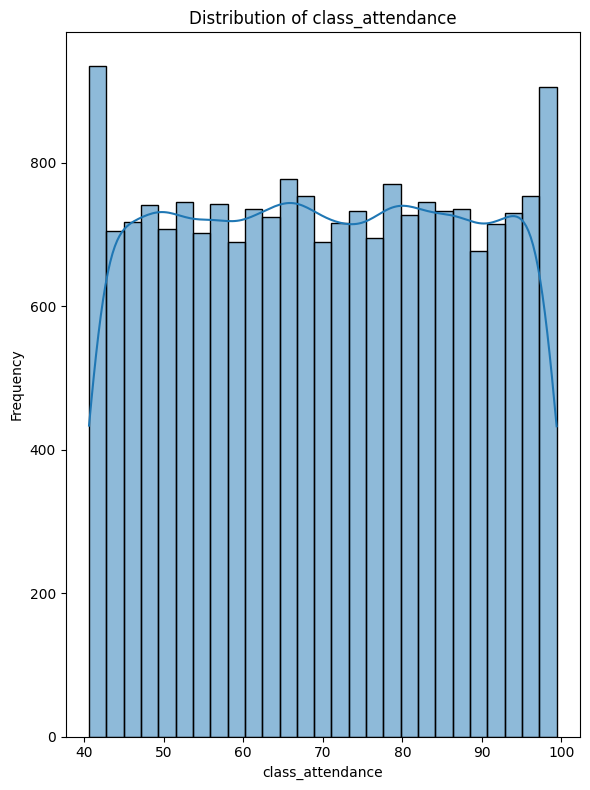

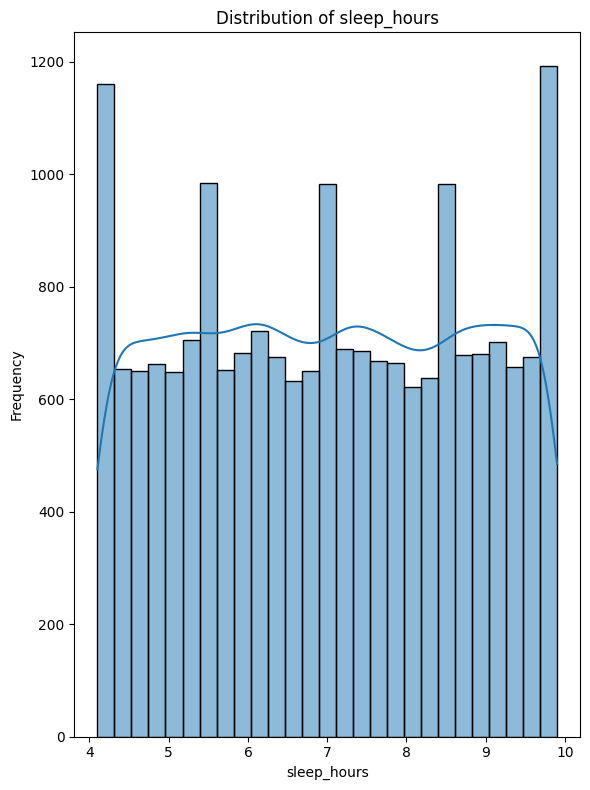

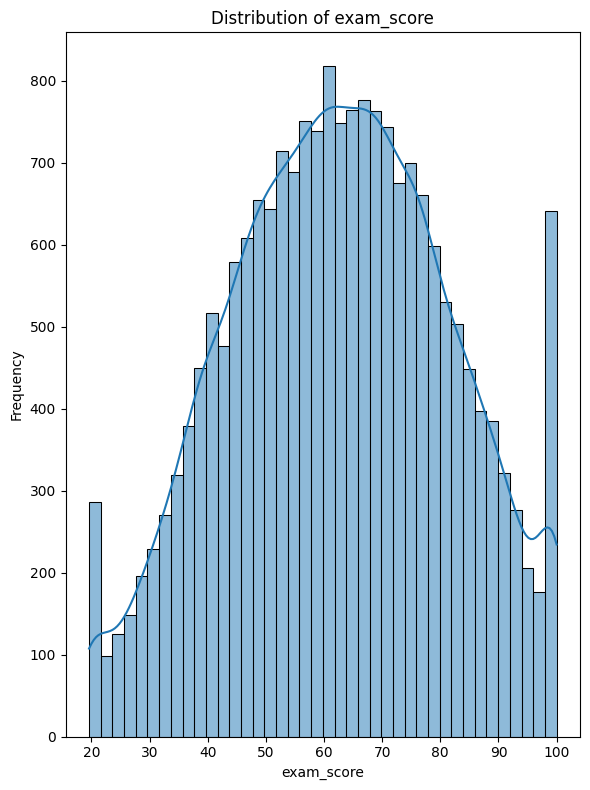

In [10]:
for col in numerical:
  plt.figure(figsize=(6,8))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

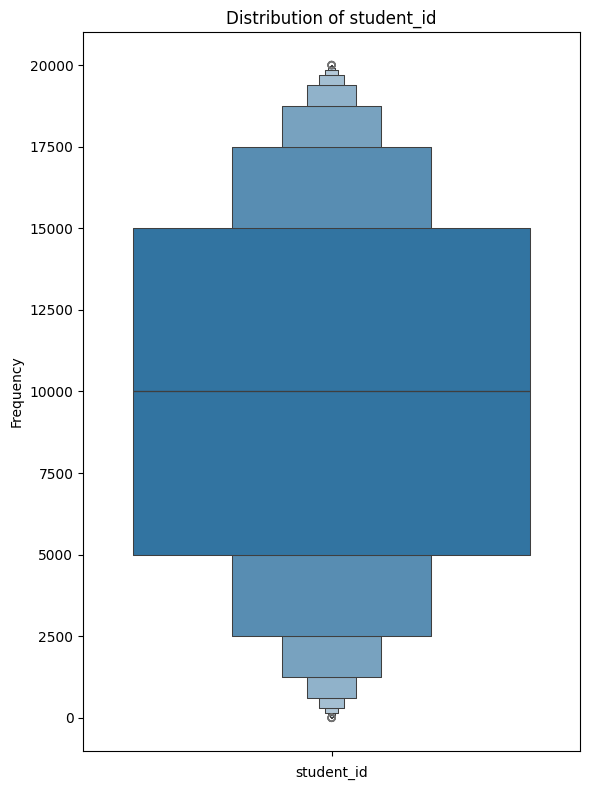

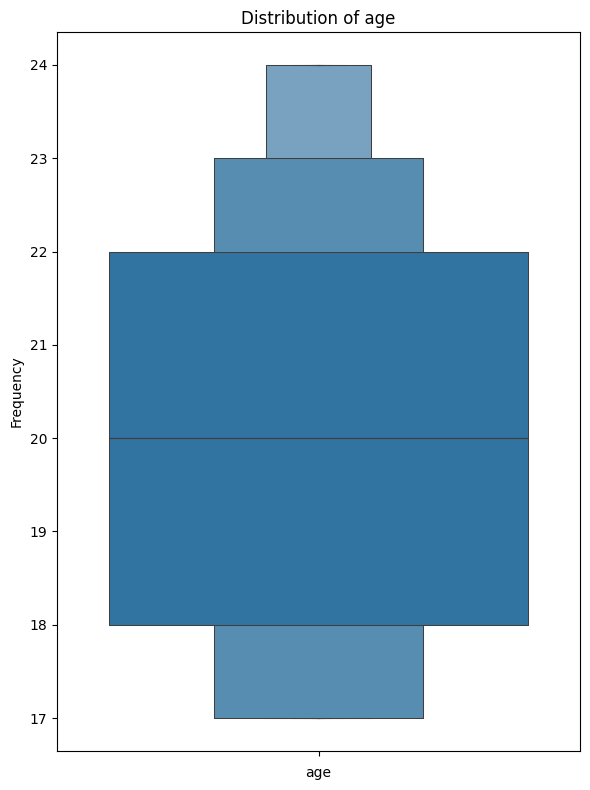

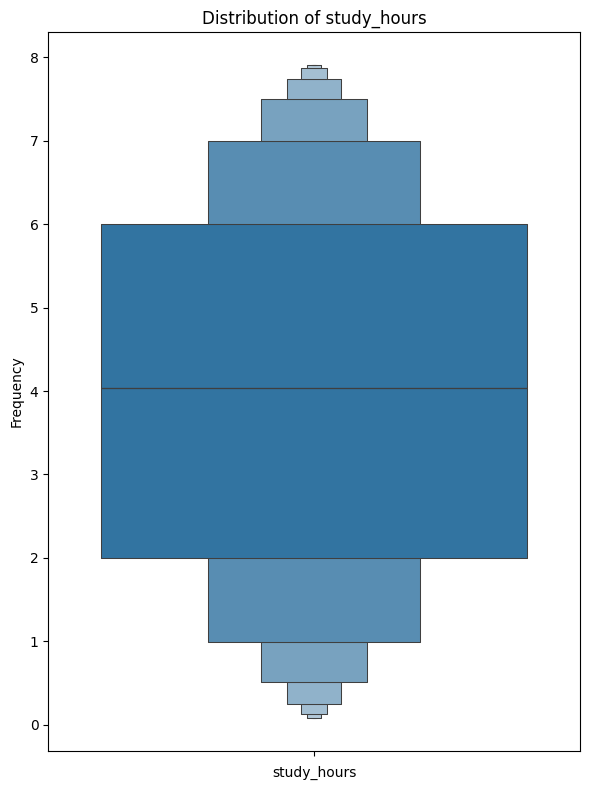

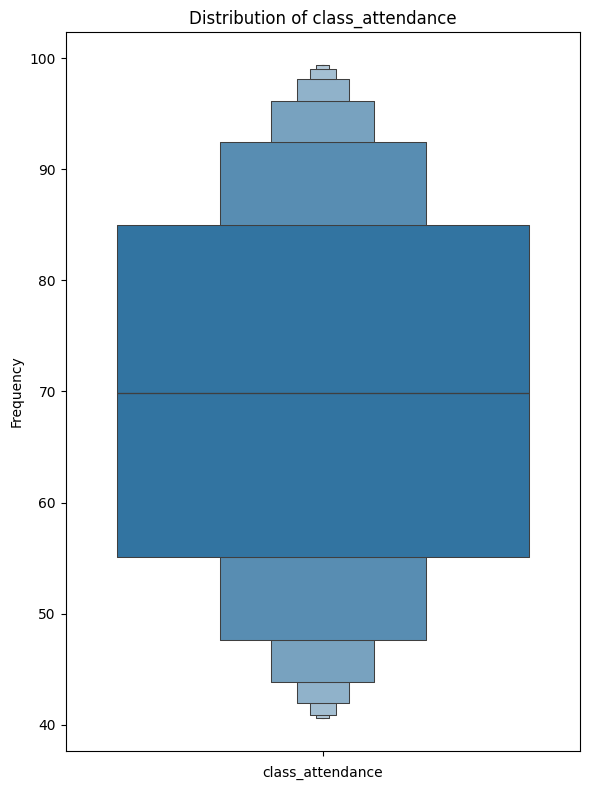

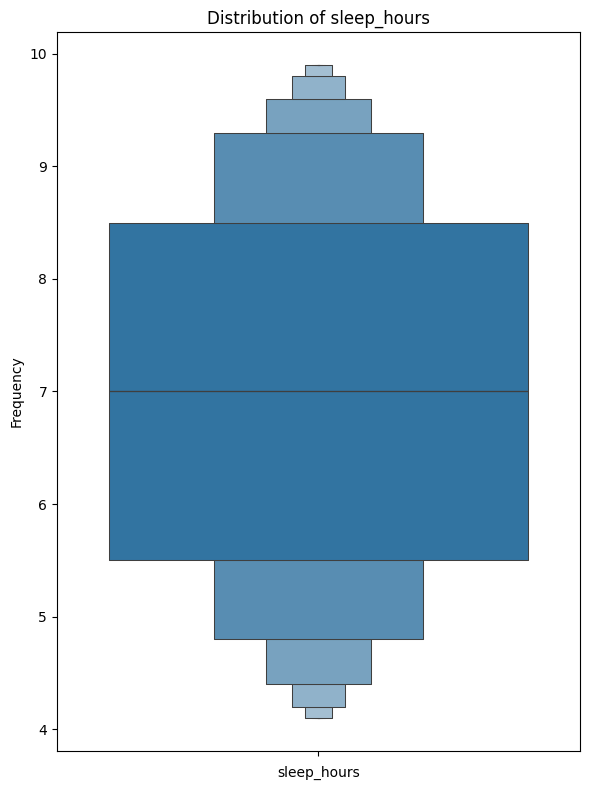

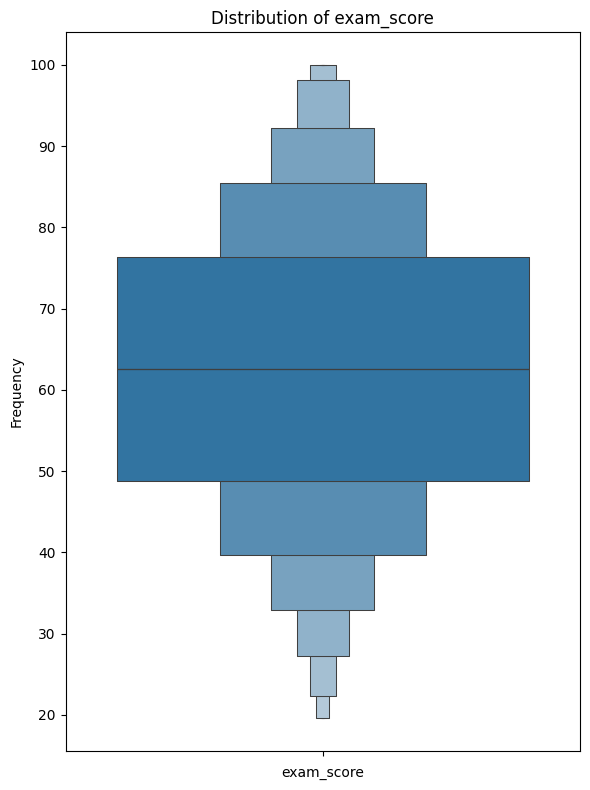

In [11]:
for col in numerical:
  plt.figure(figsize=(6,8))
  sns.boxenplot(df[col])
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
label = [col for col in categorical if df[col].nunique() == 2]

In [15]:
hot = [col for col in categorical if df[col].nunique() > 2]

In [16]:
for col in label:
  df[col] = le.fit_transform(df[col])

In [17]:
df = pd.get_dummies(df, columns=hot)

In [21]:
df.head()

,student_id,age,study_hours,class_attendance,internet_access,sleep_hours,exam_score,gender_female,gender_male,gender_other,...,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
0,1,17,2.78,92.9,1,7.4,58.9,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,2,23,3.37,64.8,1,4.6,54.8,False,False,True,...,False,False,True,False,False,False,True,False,False,True
2,3,22,7.88,76.8,1,8.5,90.3,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,4,20,0.67,48.4,1,5.8,29.7,False,False,True,...,False,False,True,False,False,True,False,False,False,True
4,5,20,0.89,71.6,1,9.8,43.7,True,False,False,...,False,False,False,False,False,True,False,False,False,True


In [18]:
numerical = df.select_dtypes(include=["int64","float64"]).columns

<Axes: >

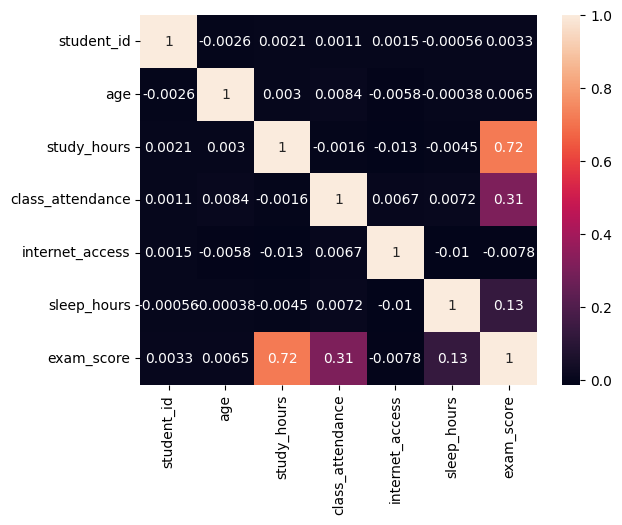

In [19]:
sns.heatmap(df[numerical].corr(),annot=True)